In [264]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import random
from itertools import count
from matplotlib import style

In [267]:
style.use('fivethirtyeight')

fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
x_vals = []
y_vals = []
index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0,5))
    
    plt.cla()
    plt.plot(x_vals, y_vals)

ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
plt.tight_layout()
plt.show()

/Users/liuyifu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

In [ ]:
# style.use('fivethirtyeight')

# fig = plt.figure()
# # ax1 = fig.add_subplot(1,1,1)
# x_vals = []
# y_vals = []
# index = count()

# def animate(i):
#     f = open('test.txt', 'r').read()
#     lines = f.split('\n')
#     xs = []
    
#     plt.cla()
#     plt.plot(x_vals, y_vals)

# ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
# plt.tight_layout()
# plt.show()

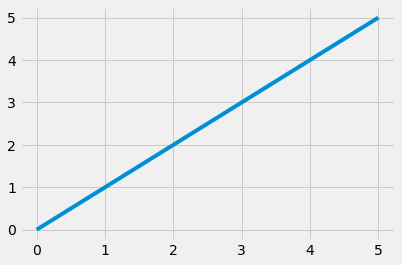

In [251]:
style.use('fivethirtyeight')

fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
x_vals = [0,1,2,3,4,5]
y_vals = [0,1,2,3,4,5]



plt.plot(x_vals, y_vals)
plt.show()

In [270]:
from sqlalchemy import create_engine
import pymysql

class upload_mysql():

    def __init__(self, table_name) -> None:
        """
        If mysql is not launched, run the following scripts:
        mysql -u root
        """
        self.sqlEngine = create_engine('mysql+pymysql://root:@127.0.0.1/face_to_monitor_distance', \
                        pool_recycle=3600)
        self.dbConnection = self.sqlEngine.connect()

        self.table_name = table_name
        # self._table_existence = self._table_existence
        if not self._table_existence():
            sql_query = f"""
            create table {self.table_name} (
                image_name nvarchar(40),
                date_time datetime,
                distances decimal(19,4),
                avg_distance decimal(19,4),
                distance_limit float
            )
            
            """
            self.dbConnection.execute(sql_query)
        
        else: pass


    def _table_existence(self):

        # cursor = self.dbConnection.execute()
        sql_query = f"""
                SELECT COUNT(*)
                FROM information_schema.tables 
                WHERE table_schema = 'face_to_monitor_distance'
                AND table_name=  '{self.table_name}'
        """

        cursor = self.dbConnection.execute(sql_query)

        row = cursor.fetchall()
        

        if not row:
            return True

        else: return False

    def insert_table(self, input: list) -> None:
        image_name, date_time, distances, avg_distance, distance_limit = input
        sql_query = f"""
            insert into {self.table_name} (image_name, date_time, distances, avg_distance, distance_limit)
            values({image_name},{date_time},{round(distances,4)},{round(avg_distance,4)},{distance_limit})
        """

        self.dbConnection.execute(sql_query)

In [271]:
ml = upload_mysql('test1')